In [165]:
import numpy as np
import sep

In [166]:
#Basically setting up image and plots for it
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mlp
%matplotlib inline

rcParams['figure.figsize'] = [10.,8.]

In [167]:
#Reading image into 2-d numpy array
from astropy.utils.data import download_file
url="https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
filename = download_file(url, cache=True)

hdu = fits.open(filename)
hdu.info()

from astropy.utils.data import download_file
url="https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
f2 = download_file(url, cache=True)

hdu = fits.open(f2)
hdu.info()

from astropy.utils.data import download_file
url="https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"
f3 = download_file(url, cache=True)

hdu = fits.open(f3)
hdu.info()

data = hdu[0].data.astype(float)


Filename: /Users/davincitb/.astropy/cache/download/url/6d334c8b94b19aca93bfb05d048d4006/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   
Filename: /Users/davincitb/.astropy/cache/download/url/2160fc23bc596bef93f07808e0f0ef39/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   (3600, 3600)   float32   
Filename: /Users/davincitb/.astropy/cache/download/url/be0a646b6b1b5d15293c7505fbce2214/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   (3600, 3600)   float32   


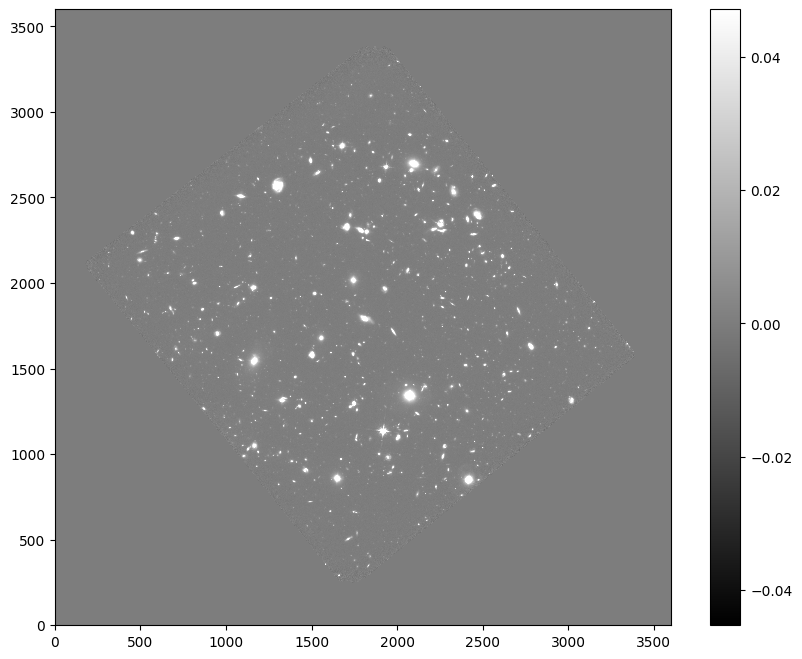

In [168]:
#Show image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('1.png',bbox_inches = 'tight',dpi = 300)
plt.show()

In [169]:
#Measure spatially varying background
bkg = sep.Background(data)

In [170]:
#Get general mean and noise
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0004939954960718751


In [171]:
#Evaluating background
bkg_image = bkg.back()

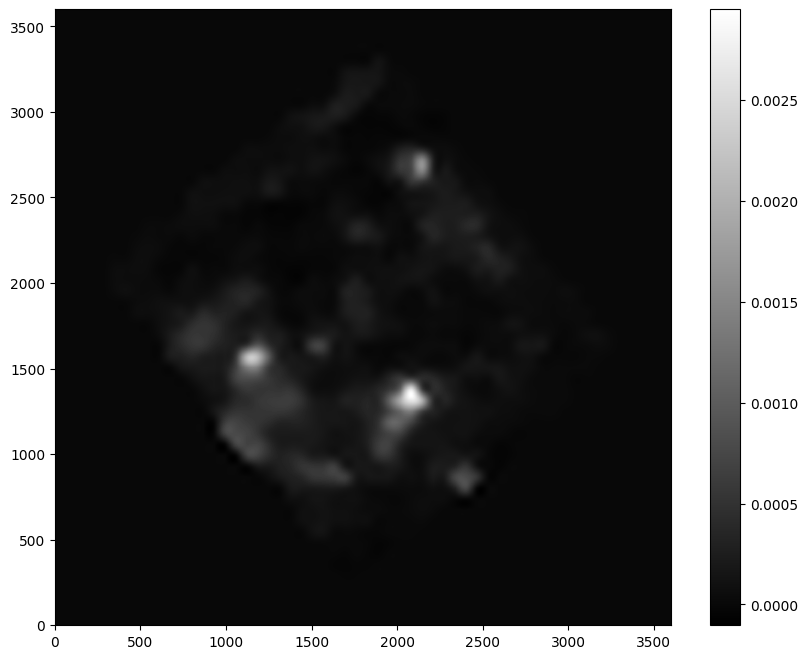

In [172]:
#Showing background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('2.png',bbox_inches = 'tight',dpi = 300)
plt.show()

In [173]:
#Now as 2d array
bkg_rms = bkg.rms()

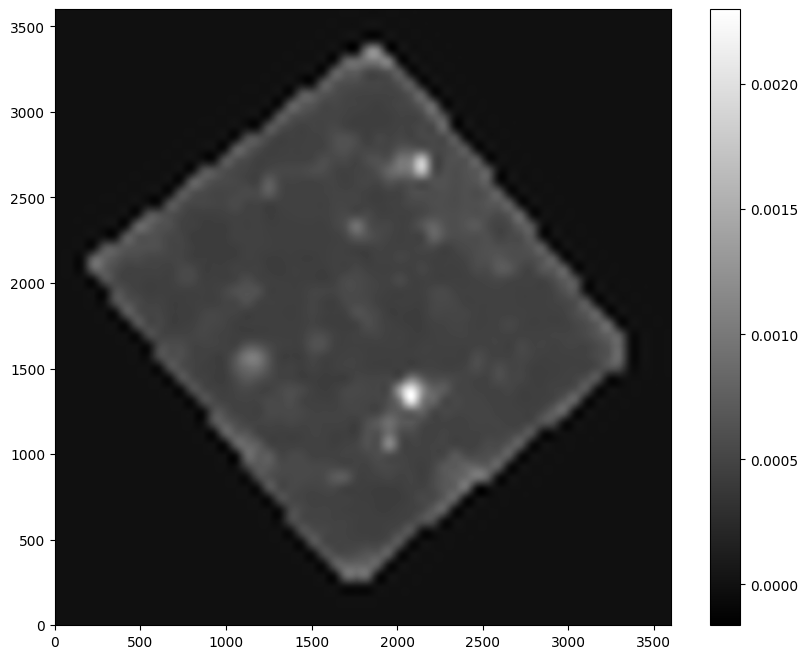

In [174]:
#Show background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('3.png',bbox_inches = 'tight',dpi = 300)
plt.show()

In [175]:
#subtracting background
data_sub = data - bkg
len(data_sub)

3600

In [176]:
objects = sep.extract(data_sub, 5, err=bkg.globalrms)
#objects detected
len(objects)

2354

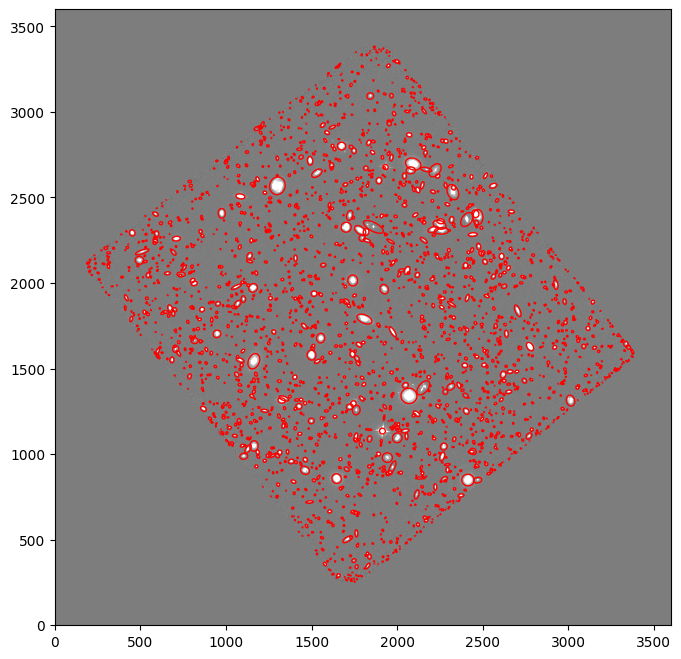

In [177]:
from matplotlib.patches import Ellipse

# plot reduced background image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an object ellipse
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('4.png',bbox_inches = 'tight',dpi = 300)
plt.show()

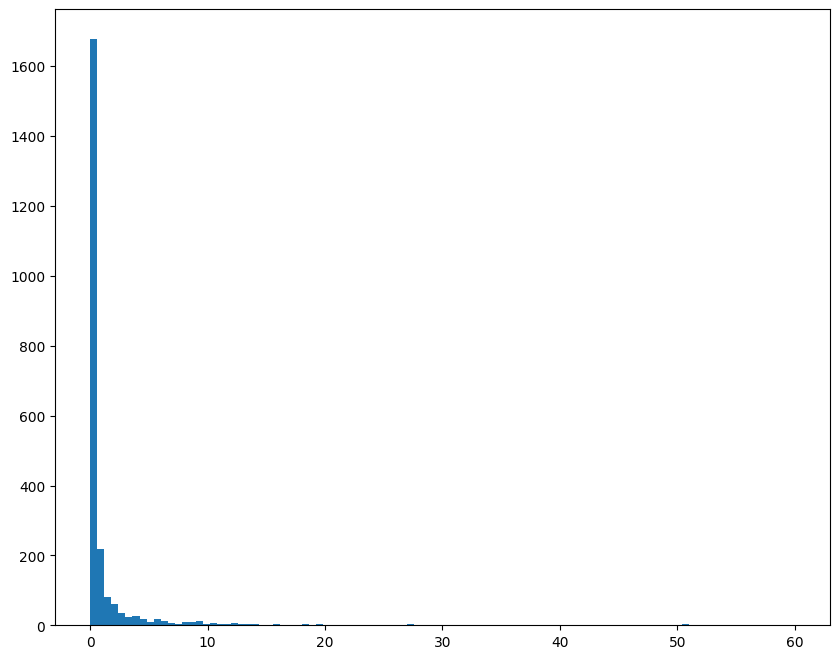

In [178]:
#histogram for objects which are 2633
fluxes = objects["flux"]
plt.hist(fluxes, bins = 100, range=[0,60])
plt.show()

In [179]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [180]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)
# show first 10 results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.041086 +/- 0.202713
object 1: flux = 0.056437 +/- 0.237578
object 2: flux = 0.079010 +/- 0.281099
object 3: flux = 0.059655 +/- 0.244257
object 4: flux = 0.039879 +/- 0.199714
object 5: flux = 0.060676 +/- 0.246338
object 6: flux = 0.039985 +/- 0.199981
object 7: flux = 0.052582 +/- 0.229322
object 8: flux = 0.048460 +/- 0.220153
object 9: flux = 0.041209 +/- 0.203016


In [181]:
#Setting up math stuff for fluxes
mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes)
std_dev_flux = np.std(fluxes)

print("Mean of fluxes =", mean_flux)
print("Median of fluxes =", median_flux)
print("Standard deviation of fluxes =",std_dev_flux)

Mean of fluxes = 4.493954529203617
Median of fluxes = 0.18341265618801117
Standard deviation of fluxes = 36.057671322004545


In [182]:
#largest outlier info
z_scores = [(x - mean_flux) / std_dev_flux for x in fluxes]
outlier_indices = [i for i, z in enumerate(z_scores) if abs(z) > 3]
if outlier_indices:
    largest_outlier_index = outlier_indices[np.argmax(np.abs([z_scores[i] for i in outlier_indices]))]
    largest_outlier_value = fluxes[largest_outlier_index]
    largest_outlier_z_score = z_scores[largest_outlier_index]
    
    print(f"Largest outlier value: {largest_outlier_value:.4f}")
    print(f"The outlier is {abs(largest_outlier_z_score):.4f} standard deviations away from the mean.")
    flattened_data_sub = data_sub.ravel()
    outlier_coords = np.unravel_index(largest_outlier_index, data_sub.shape)
    print(f"Location on the image (tuple coords): {outlier_coords}")

Largest outlier value: 1160.7573
The outlier is 32.0671 standard deviations away from the mean.
Location on the image (tuple coords): (np.int64(0), np.int64(469))


In [185]:
#copying whats in lecture 15, but the code is really wonky now
df1 = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz (1).fits"
df2 = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
df3 = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"
hdu_2 = fits.open(df1)
hdu_3 = fits.open(df2)
hdu_4 = fits.open(df3)
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data


def rescale_image(data):

    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2
    vpin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp,vpin,vpmax

def fits_quicklook(data,fnx=10,fny=10):
    f - plt.figure(figsize=(fnx,fny))
    pdata_tmp, vpmin, vpmax = rescale_image(data)
    plt.imshow(pdata_tmp, vmin=vpmin, vmax=vpmax)

Nfilename, d2min, d2max = rescale_image(data_2)
Nf2, d3min, d3max = rescale_image(data_3)
Nf3, d4min, d4max = rescale_image(data_4)

In [190]:
Nfilename[Nfilename<d2min] = d2min
Nfilename[Nfilename<d2max] = d2max
Nf2[Nfilename<d2min] = d3min
Nf2[Nfilename<d2max] = d3max
Nf3[Nfilename<d2min] = d4min
Nf3[Nfilename<d2max] = d4max

rgb = np.zeros((Nfilename.shape[0], Nfilename.shape[1], 3))
rgb[:,:,1] = (Nfilename-d2min)/(d2max-d2min)
rgb[:,:,1] = (Nf2-d3min)/(d3max-d3min)
rgb[:,:,2] = (Nf3-d4min)/(d4max-d4min)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.2452244758605957].


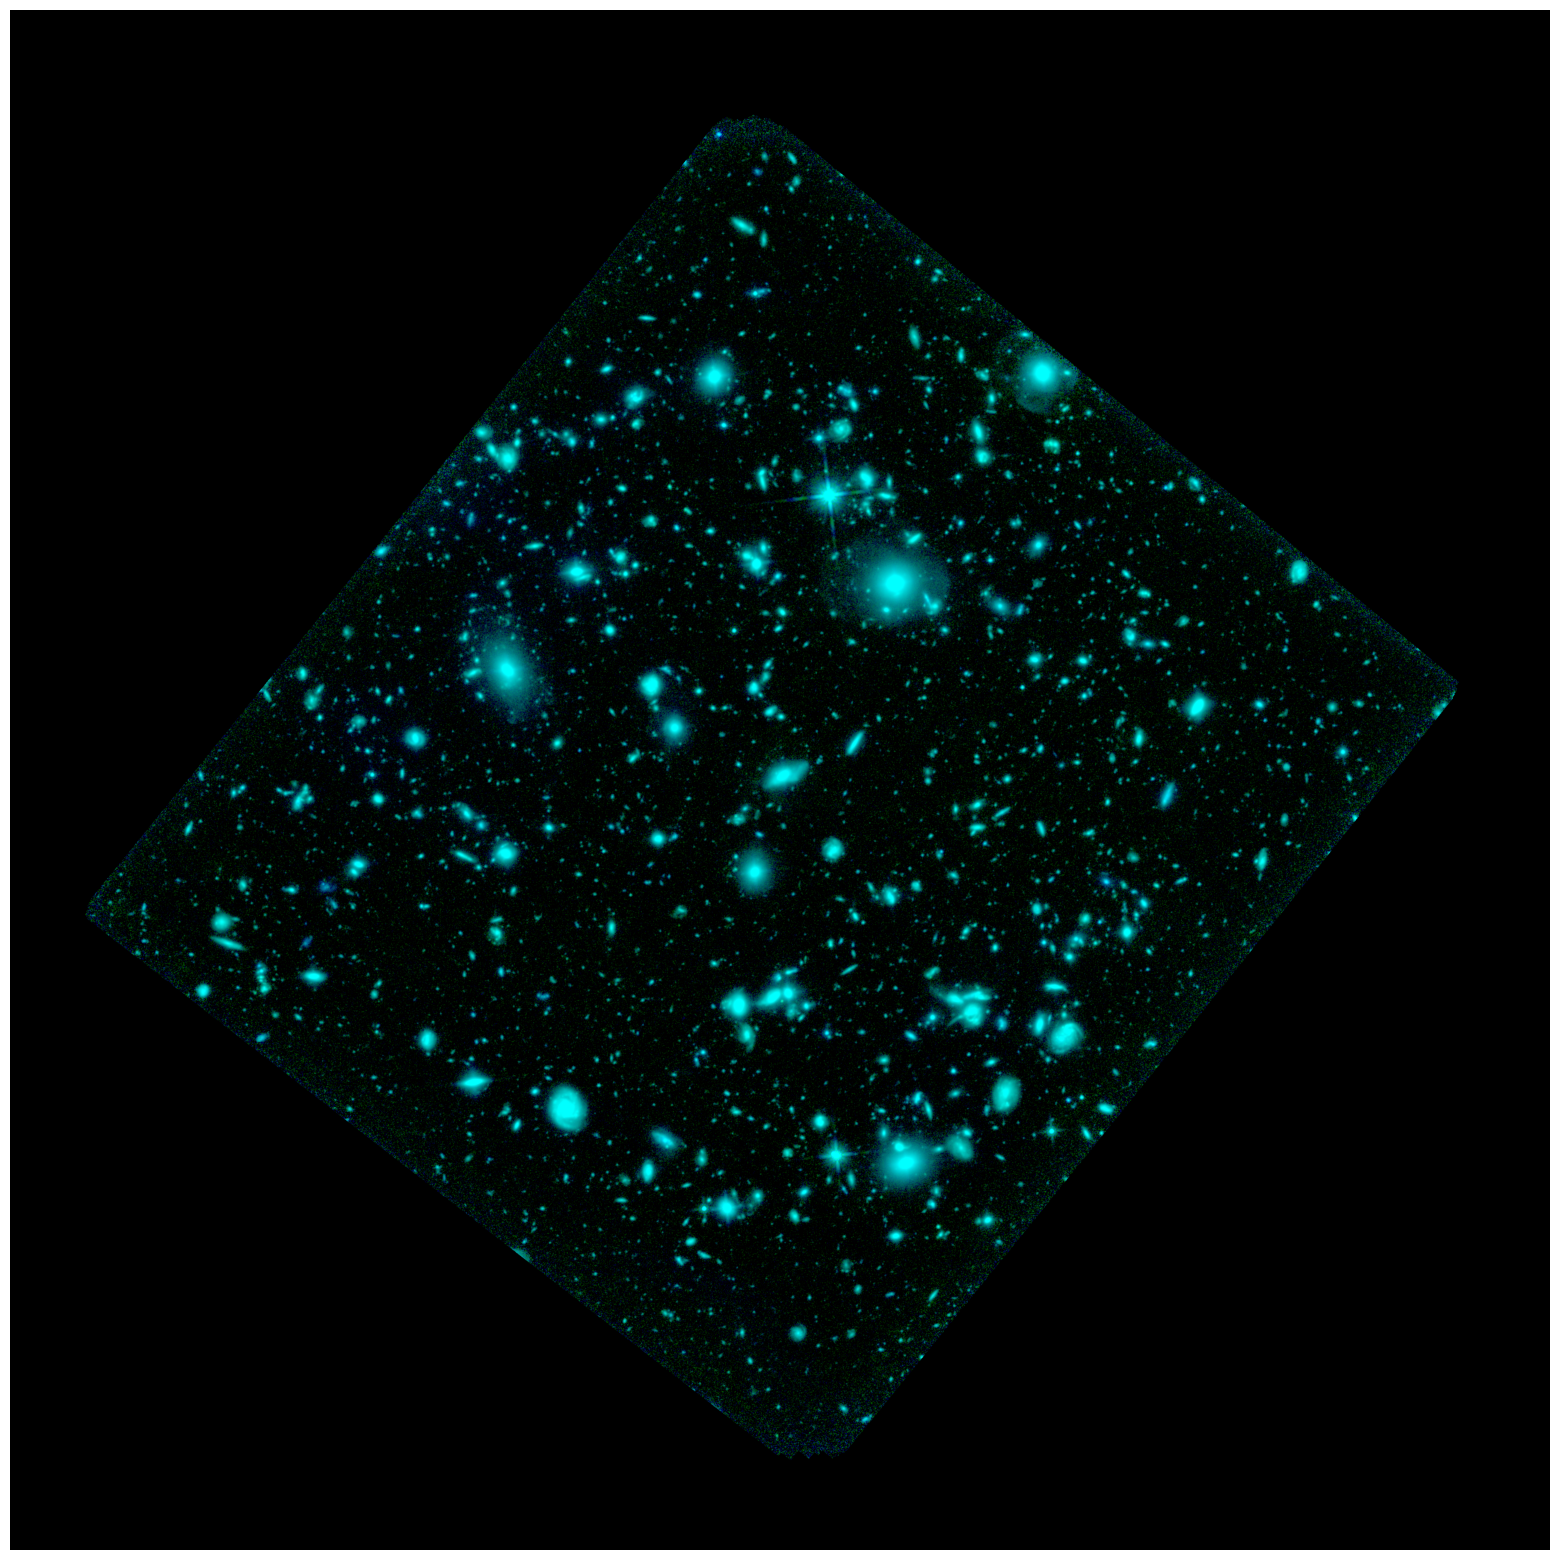

In [191]:
f,ax = plt.subplots(1,1, figsize = (20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('rbg_attempt.png', bbox_inches = 'tight', pad_inches = 0, dpi = 100)